In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Uploding our dataset
df = pd.read_csv("C:/Users/Faith/Downloads/placement-dataset.csv")
df.head(5)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


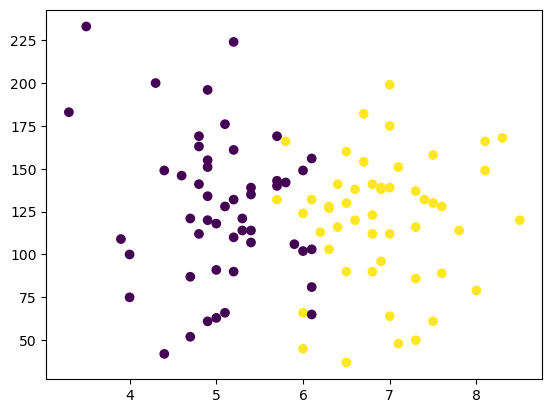

In [4]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [5]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [6]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


Train test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )
X_train

,cgpa,iq
55,7.8,114.0
65,8.1,166.0
43,6.8,141.0
42,7.6,89.0
46,5.3,114.0
...,...,...
49,5.4,135.0
92,5.2,110.0
60,6.9,139.0
25,5.0,91.0


In [8]:
#Scale the value
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train[:20,:]

array([[ 1.55118887, -0.27451987],
       [ 1.81280892,  0.96543958],
       [ 0.67912204,  0.36930523],
       [ 1.3767755 , -0.87065422],
       [-0.6289782 , -0.27451987],
       [-1.06501161,  1.0369757 ],
       [-0.01853142,  0.56006822],
       [-0.97780493,  0.60775897],
       [ 0.85353541,  1.18004794],
       [ 0.41750199,  0.10700612],
       [ 1.72560224, -1.10910796],
       [-0.89059825, -1.49063394],
       [ 0.24308863,  0.05931537],
       [-0.97780493,  0.70314046],
       [ 0.67912204, -0.0599115 ],
       [-1.1522183 , -0.91834496],
       [ 0.85353541, -0.32221062],
       [-0.97780493, -0.13144762],
       [ 0.06867526,  0.72698584],
       [ 0.06867526, -1.44294319]])

In [9]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.24308863, -0.53681898],
       [ 1.20236214,  0.15469686],
       [-1.76266508, -0.6083551 ],
       [-0.80339157,  0.05931537],
       [-0.6289782 , -0.10760225],
       [-1.06501161, -0.32221062],
       [-0.01853142, -1.41909782],
       [ 1.28956882,  0.10700612],
       [-0.19294479,  0.96543958],
       [-0.1057381 , -0.46528286],
       [ 0.50470868,  0.29776911],
       [ 0.06867526, -1.06141721],
       [-0.97780493, -1.53832469],
       [ 0.41750199, -0.84680884],
       [-1.23942498,  0.4885321 ],
       [-0.71618488,  0.15469686],
       [ 0.67912204, -0.84680884],
       [ 2.16163565, -0.13144762],
       [-0.71618488,  0.84621271],
       [-0.97780493,  0.20238761]])

In [11]:
#Train the model

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()


In [13]:
clf.fit(X_train,y_train)

LogisticRegression()

In [14]:
y_prec = clf.predict(X_test)
y_prec

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
      dtype=int64)

In [15]:
# To find prediction accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prec)

0.9

<AxesSubplot:>

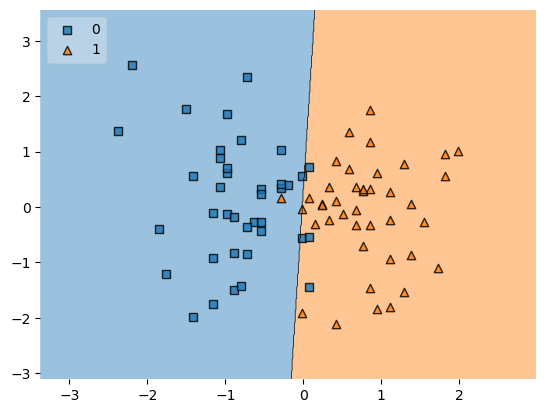

In [18]:
# To see how our model divide the dataset

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [17]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 801.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
# Pickle is library used for to make file of trained model to use it in many place

import pickle
pickle.dump(clf, open('Logistic regression.pkl', 'wb'))